# Final HW - Predicting music genre based on audio features (classification task)
Aim: _to classify music tracks into the top 10 genres based on audio features using supervised machine learning._

## Step 1. Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 2. Load Dataset

In [26]:
file_path = "data/train.csv"  # Make sure the file is in the data/ folder
df = pd.read_csv(file_path)
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (114000, 21)
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          5

## Step 3. Data Cleaning & Preprocessing

In [27]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1)

# Filter top 10 genres only
top_genres = df['track_genre'].value_counts().nlargest(10).index
df = df[df['track_genre'].isin(top_genres)]

# Check for missing values
print("Missing values:")
print(df.isna().sum())

Missing values:
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


## Step 4. Exploratory Data Analysis

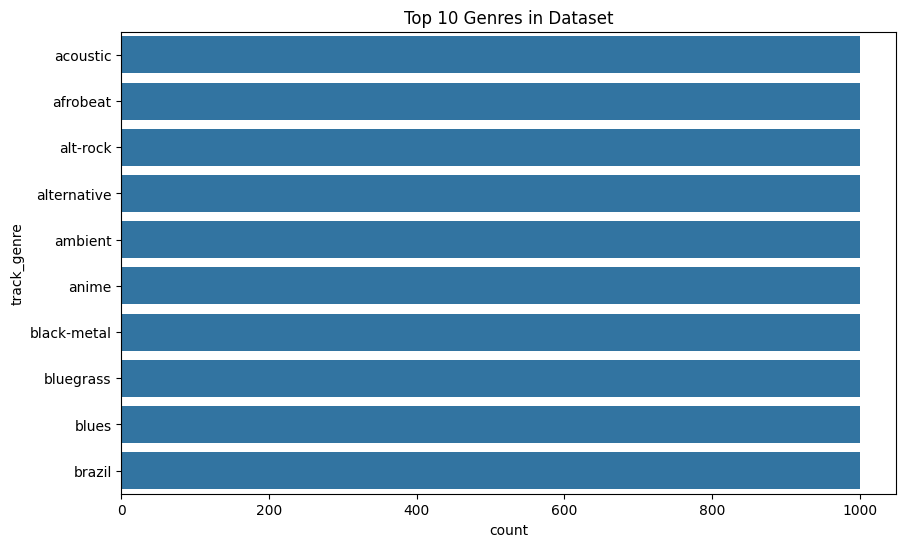

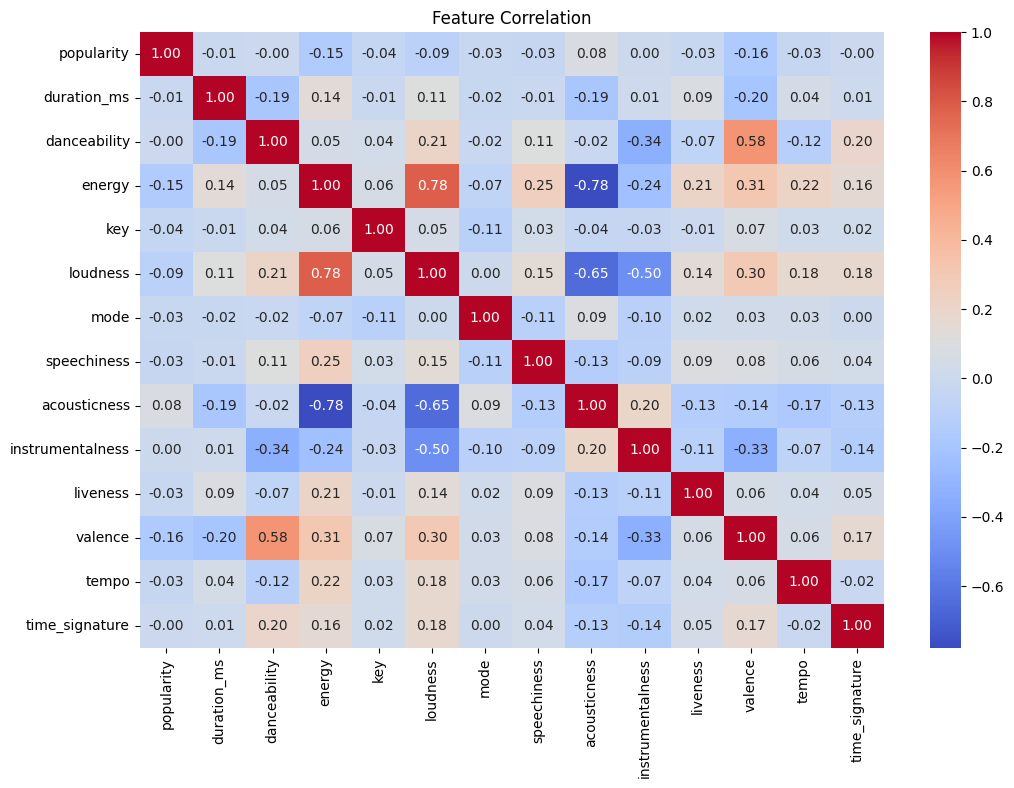

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='track_genre', order=top_genres)
plt.title("Top 10 Genres in Dataset")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

## Step 5. Feature/Target Split

In [29]:
X = df.drop("track_genre", axis=1)
y = df["track_genre"]

## Step 6. Train/Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7. Feature Scaling

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 8. Model Training

In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}
for name, model in models.items():
    print(f"\nМодель: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Модель: Logistic Regression
Accuracy: 0.48
              precision    recall  f1-score   support

    acoustic       0.47      0.56      0.51       208
    afrobeat       0.56      0.63      0.59       202
    alt-rock       0.16      0.16      0.16       192
 alternative       0.43      0.41      0.42       201
     ambient       0.75      0.67      0.71       209
       anime       0.29      0.29      0.29       186
 black-metal       0.77      0.82      0.80       211
   bluegrass       0.52      0.61      0.56       204
       blues       0.26      0.14      0.18       212
      brazil       0.43      0.46      0.45       175

    accuracy                           0.48      2000
   macro avg       0.46      0.48      0.47      2000
weighted avg       0.47      0.48      0.47      2000


Модель: K-Nearest Neighbors
Accuracy: 0.5305
              precision    recall  f1-score   support

    acoustic       0.42      0.56      0.48       208
    afrobeat       0.59      0.63      0.6

## Step 9. Compare Results

In [33]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1_macro"])
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy  F1_macro
0        Random Forest    0.6525  0.649237
1  Logistic Regression    0.2800  0.239977
2                  KNN    0.1870  0.184872


## Conclusion:

- Random Forest performed best with an Accuracy of 65.25% and an F1-macro score of 0.65, indicating strong generalization across all classes.

- Logistic Regression and K-Nearest Neighbors (KNN) showed significantly weaker performance, with accuracy scores of 28.00% and 18.70%, respectively.

- Therefore, Random Forest is the most suitable model for this multi-class genre classification task based on audio features.

Було обрано датасет: "Spotify Tracks Genre"
https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset

Задача: на основі характеристик треків (danceability, energy, tempo тощо) передбачити жанр музики.

Тип задачі: класифікація

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
print(df.head())

In [ ]:
print(df.info())

In [ ]:
print(df.describe())

In [ ]:
df = df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1)

In [ ]:
print(df['track_genre'].value_counts().head(10))

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='track_genre', order=df['track_genre'].value_counts().iloc[:10].index)
plt.title("Топ-10 жанрів у датасеті")
plt.show()

In [ ]:
# однакова кількість пісень на кожен жанр

In [ ]:
top_genres = df['track_genre'].value_counts().nlargest(10).index
df = df[df['track_genre'].isin(top_genres)]

In [ ]:
df = df.dropna()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop('track_genre', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

In [ ]:
X = df.drop('track_genre', axis=1)
y = df['track_genre']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

In [ ]:
for name, model in models.items():
    print(f"\nМодель: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
importances = models['Random Forest'].feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=X.columns)
plt.title("Важливість ознак (Random Forest)")
plt.show()

Висновки:  
- Модель Random Forest показала найвищу точність (Accuracy = 65.35%) і середній F1-score (0.65), тому обирається як найкраща для задачі багатокласової класифікації жанрів.  
- Найлегше класифікуються:
Black-metal – F1-score 0.93, precision і recall теж високі -> легко розпізнається, можливо через унікальні ознаки.
- Найважче класифікуються:
Alt-rock – F1-score 0.22, recall і precision низькі -> модель має труднощі з розпізнаванням, ймовірно через схожість з іншими жанрами.